In [168]:
from seirsplus.models import *
from seirsplus.networks import *
from seirsplus.sim_loops import *
from seirsplus.utilities import *
import networkx
import matplotlib.pyplot as pyplot

In [169]:
N = 10000

In [170]:
INIT_EXPOSED = int(N*0.01)

In [171]:
demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G_baseline   = demographic_graphs['baseline']
G_quarantine = demographic_graphs['distancingScale0.7']

households_indices = [household['indices'] for household in households]

Generated overall age distribution:
0-9: 0.1188	(-0.0022 from target)
10-19: 0.1244	(-0.0066 from target)
20-29: 0.1396	(0.0026 from target)
30-39: 0.1301	(-0.0029 from target)
40-49: 0.1231	(-0.0009 from target)
50-59: 0.1355	(0.0045 from target)
60-69: 0.1188	(0.0038 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0377	(-0.0003 from target)

Generated household size distribution:
1: 0.2782	(-0.0055 from target)
2: 0.3563	(0.0111 from target)
3: 0.1422	(-0.0085 from target)
4: 0.1341	(0.0064 from target)
5: 0.0536	(-0.0042 from target)
6: 0.0247	(0.0021 from target)
7: 0.0110	(-0.0014 from target)
Num households: 4087
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


Baseline:
Degree: mean = 13.93, std = 13.55, 95% CI = (2.00, 51.00)
        coeff var = 0.97
Assortativity:    0.13
Clustering coeff: 0.25



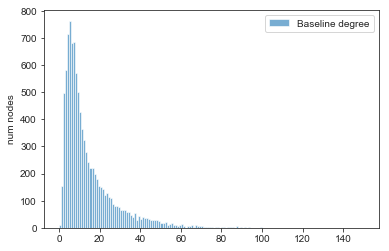

In [172]:
network_info(G_baseline, "Baseline", plot=True)

Quarantine:
Degree: mean = 2.27, std = 1.56, 95% CI = (0.00, 6.00)
        coeff var = 0.69
Assortativity:    0.96
Clustering coeff: 0.58



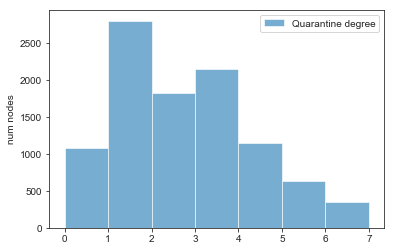

In [173]:

network_info(G_quarantine, "Quarantine", plot=True)

latent period:  mean = 2.20, std = 1.10, 95% CI = (0.60, 4.84)

pre-symptomatic period:  mean = 3.02, std = 1.81, 95% CI = (0.55, 7.45)

total incubation period:  mean = 5.22, std = 2.12, 95% CI = (1.97, 10.20)



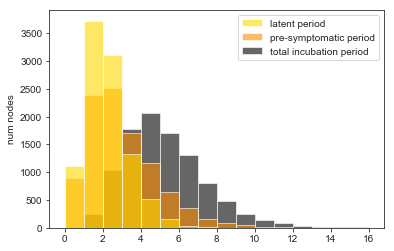

In [174]:
latentPeriod_mean, latentPeriod_coeffvar = 3.0, 0.6
SIGMA   = 1 / gamma_dist(latentPeriod_mean, latentPeriod_coeffvar, N)

presymptomaticPeriod_mean, presymptomaticPeriod_coeffvar = 2.2, 0.5
LAMDA   = 1 / gamma_dist(presymptomaticPeriod_mean, presymptomaticPeriod_coeffvar, N)

dist_info([1/LAMDA, 1/SIGMA, 1/LAMDA+1/SIGMA], ["latent period", "pre-symptomatic period", "total incubation period"], plot=True, colors=['gold', 'darkorange', 'black'], reverse_plot=True)

pre-symptomatic period:  mean = 2.20, std = 1.10, 95% CI = (0.60, 4.84)

(a)symptomatic period:  mean = 3.99, std = 1.58, 95% CI = (1.52, 7.68)

total infectious period:  mean = 6.19, std = 1.92, 95% CI = (3.06, 10.45)



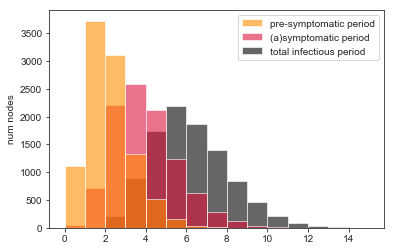

In [175]:

symptomaticPeriod_mean, symptomaticPeriod_coeffvar = 4.0, 0.4
GAMMA   = 1 / gamma_dist(symptomaticPeriod_mean, symptomaticPeriod_coeffvar, N)

infectiousPeriod = 1/LAMDA + 1/GAMMA

dist_info([1/LAMDA, 1/GAMMA, 1/LAMDA+1/GAMMA], ["pre-symptomatic period", "(a)symptomatic period", "total infectious period"], plot=True, colors=['darkorange', 'crimson', 'black'], reverse_plot=True)

onset-to-hospitalization period:  mean = 11.00, std = 4.90, 95% CI = (3.58, 22.42)

hospitalization-to-discharge period:  mean = 10.93, std = 4.95, 95% CI = (3.57, 22.65)

onset-to-discharge period:  mean = 21.93, std = 7.00, 95% CI = (10.33, 37.73)



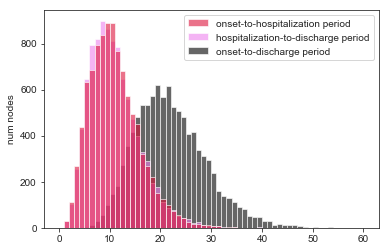

In [176]:
onsetToHospitalizationPeriod_mean, onsetToHospitalizationPeriod_coeffvar = 11.0, 0.45
ETA     = 1 / gamma_dist(onsetToHospitalizationPeriod_mean, onsetToHospitalizationPeriod_coeffvar, N)

hospitalizationToDischargePeriod_mean, hospitalizationToDischargePeriod_coeffvar = 11.0, 0.45
GAMMA_H = 1 / gamma_dist(hospitalizationToDischargePeriod_mean, hospitalizationToDischargePeriod_coeffvar, N)

dist_info([1/ETA, 1/GAMMA_H, 1/ETA+1/GAMMA_H], ["onset-to-hospitalization period", "hospitalization-to-discharge period", "onset-to-discharge period"], plot=True, colors=['crimson', 'violet', 'black'], reverse_plot=True)

onset-to-hospitalization period:  mean = 11.00, std = 4.90, 95% CI = (3.58, 22.42)

hospitalization-to-death period:  mean = 6.95, std = 3.13, 95% CI = (2.25, 14.25)

onset-to-death period:  mean = 17.95, std = 5.81, 95% CI = (8.27, 30.92)



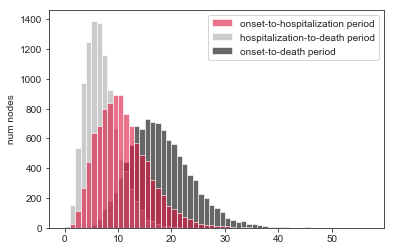

In [177]:
hospitalizationToDeathPeriod_mean, hospitalizationToDeathPeriod_coeffvar = 7.0, 0.45
MU_H    = 1 / gamma_dist(hospitalizationToDeathPeriod_mean, hospitalizationToDeathPeriod_coeffvar, N)

dist_info([1/ETA, 1/MU_H, 1/ETA+1/MU_H], ["onset-to-hospitalization period", "hospitalization-to-death period", "onset-to-death period"], plot=True, colors=['crimson', 'darkgray', 'black'], reverse_plot=True)

In [178]:
PCT_ASYMPTOMATIC = 0.25

In [179]:
PCT_ASYMPTOMATIC = [0.8 if age in ['0-9', '10-19'] else PCT_ASYMPTOMATIC for age in individual_ageGroups]

In [180]:
ageGroup_pctHospitalized = {'0-9':      0.0000,
                            '10-19':    0.0004,
                            '20-29':    0.0104,
                            '30-39':    0.0343,
                            '40-49':    0.0425,
                            '50-59':    0.0816,
                            '60-69':    0.118,
                            '70-79':    0.166,
                            '80+':      0.184 }
PCT_HOSPITALIZED = [ageGroup_pctHospitalized[ageGroup] for ageGroup in individual_ageGroups]

In [181]:
ageGroup_hospitalFatalityRate = {'0-9':     0.0000,
                                 '10-19':   0.3627,
                                 '20-29':   0.0577,
                                 '30-39':   0.0426,
                                 '40-49':   0.0694,
                                 '50-59':   0.1532,
                                 '60-69':   0.3381,
                                 '70-79':   0.5187,
                                 '80+':     0.7283 }
PCT_FATALITY = [ageGroup_hospitalFatalityRate[ageGroup] for ageGroup in individual_ageGroups]

Individual R0:  mean = 2.50, std = 0.50, 95% CI = (1.61, 3.54)



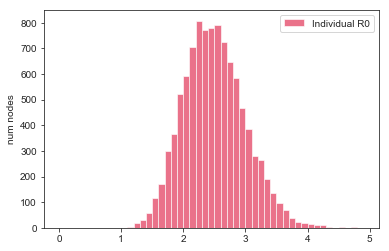

In [182]:
R0_mean     = 2.5
R0_coeffvar = 0.2

R0 = gamma_dist(R0_mean, R0_coeffvar, N)

dist_info(R0, "Individual R0", bin_size=0.1, plot=True, colors='crimson')

In [183]:

BETA = 1/infectiousPeriod * R0

In [184]:
BETA_Q = BETA * (0.3/R0_mean)


In [185]:
BETA_PAIRWISE_MODE  = 'infected'

In [186]:
DELTA_PAIRWISE_MODE = 'mean'

In [187]:
ALPHA = [0.5 if age in ['0-9', '10-19'] else 1.0 for age in individual_ageGroups]

In [188]:
P_GLOBALINTXN = 1.0

In [189]:

Q_GLOBALINTXN = 0.05

In [190]:
INTERVENTION_START_PCT_INFECTED = 1/100
AVERAGE_INTRODUCTIONS_PER_DAY   = 0

TESTING_CADENCE                 = 'everyday'    # how often to do tracing testing and random testing
PCT_TESTED_PER_DAY              = 1/10          # max daily test allotment defined as a percent of population size
TEST_FALSENEG_RATE              = 'temporal'    # test false negative rate, will use FN rate that varies with disease time
MAX_PCT_TESTS_FOR_SYMPTOMATICS  = 1.0           # max percent of daily test allotment to use on self-reporting symptomatics
MAX_PCT_TESTS_FOR_TRACES        = 1.0           # max percent of daily test allotment to use on contact traces
RANDOM_TESTING_DEGREE_BIAS      = 0             # magnitude of degree bias in random selections for testing, none here

PCT_CONTACTS_TO_TRACE           = 0.5           # percentage of primary cases' contacts that are traced
TRACING_LAG                     = 2             # number of cadence testing days between primary tests and tracing tests

ISOLATION_LAG_SYMPTOMATIC       = 1             # number of days between onset of symptoms and self-isolation of symptomatics
ISOLATION_LAG_POSITIVE          = 2             # test turn-around time (TAT): number of days between administration of test and isolation of positive cases
ISOLATION_LAG_CONTACT           = 0             # number of days between a contact being traced and that contact self-isolating

In [191]:
TESTING_COMPLIANCE_RATE_SYMPTOMATIC                  = 0.5
TESTING_COMPLIANCE_RATE_TRACED                       = 1.0
TESTING_COMPLIANCE_RATE_RANDOM                       = 0.8

TRACING_COMPLIANCE_RATE                              = 0.8

ISOLATION_COMPLIANCE_RATE_SYMPTOMATIC_INDIVIDUAL     = 0.3
ISOLATION_COMPLIANCE_RATE_SYMPTOMATIC_GROUPMATE      = 0.0
ISOLATION_COMPLIANCE_RATE_POSITIVE_INDIVIDUAL        = 0.8
ISOLATION_COMPLIANCE_RATE_POSITIVE_GROUPMATE         = 0.8
ISOLATION_COMPLIANCE_RATE_POSITIVE_CONTACT           = 0.8
ISOLATION_COMPLIANCE_RATE_POSITIVE_CONTACTGROUPMATE  = 0.0

In [192]:
TESTING_COMPLIANCE_RANDOM                        = (numpy.random.rand(N) < TESTING_COMPLIANCE_RATE_RANDOM)
TESTING_COMPLIANCE_TRACED                        = (numpy.random.rand(N) < TESTING_COMPLIANCE_RATE_TRACED)
TESTING_COMPLIANCE_SYMPTOMATIC                   = (numpy.random.rand(N) < TESTING_COMPLIANCE_RATE_SYMPTOMATIC)

TRACING_COMPLIANCE                               = (numpy.random.rand(N) < TRACING_COMPLIANCE_RATE)

ISOLATION_COMPLIANCE_SYMPTOMATIC_INDIVIDUAL      = (numpy.random.rand(N) < ISOLATION_COMPLIANCE_RATE_SYMPTOMATIC_INDIVIDUAL)
ISOLATION_COMPLIANCE_SYMPTOMATIC_GROUPMATE       = (numpy.random.rand(N) < ISOLATION_COMPLIANCE_RATE_SYMPTOMATIC_GROUPMATE)
ISOLATION_COMPLIANCE_POSITIVE_INDIVIDUAL         = (numpy.random.rand(N) < ISOLATION_COMPLIANCE_RATE_POSITIVE_INDIVIDUAL)
ISOLATION_COMPLIANCE_POSITIVE_GROUPMATE          = (numpy.random.rand(N) < ISOLATION_COMPLIANCE_RATE_POSITIVE_GROUPMATE)
ISOLATION_COMPLIANCE_POSITIVE_CONTACT            = (numpy.random.rand(N) < ISOLATION_COMPLIANCE_RATE_POSITIVE_CONTACT)
ISOLATION_COMPLIANCE_POSITIVE_CONTACTGROUPMATE   = (numpy.random.rand(N) < ISOLATION_COMPLIANCE_RATE_POSITIVE_CONTACTGROUPMATE)

In [193]:
model = ExtSEIRSNetworkModel(G=G_baseline, p=P_GLOBALINTXN,
                              beta=BETA, sigma=SIGMA, lamda=LAMDA, gamma=GAMMA, 
                              gamma_asym=GAMMA, eta=ETA, gamma_H=GAMMA_H, mu_H=MU_H, 
                              a=PCT_ASYMPTOMATIC, h=PCT_HOSPITALIZED, f=PCT_FATALITY,              
                              alpha=ALPHA, beta_pairwise_mode=BETA_PAIRWISE_MODE, delta_pairwise_mode=DELTA_PAIRWISE_MODE,
                              G_Q=G_quarantine, q=0, beta_Q=BETA_Q, isolation_time=14,
                              initE=INIT_EXPOSED)

In [194]:
T = 300

In [195]:
run_tti_sim(model, T, 
            intervention_start_pct_infected=INTERVENTION_START_PCT_INFECTED, average_introductions_per_day=AVERAGE_INTRODUCTIONS_PER_DAY,
            testing_cadence=TESTING_CADENCE, pct_tested_per_day=PCT_TESTED_PER_DAY, test_falseneg_rate=TEST_FALSENEG_RATE, 
            testing_compliance_symptomatic=TESTING_COMPLIANCE_SYMPTOMATIC, max_pct_tests_for_symptomatics=MAX_PCT_TESTS_FOR_SYMPTOMATICS,
            testing_compliance_traced=TESTING_COMPLIANCE_TRACED, max_pct_tests_for_traces=MAX_PCT_TESTS_FOR_TRACES,
            testing_compliance_random=TESTING_COMPLIANCE_RANDOM, random_testing_degree_bias=RANDOM_TESTING_DEGREE_BIAS,
            tracing_compliance=TRACING_COMPLIANCE, pct_contacts_to_trace=PCT_CONTACTS_TO_TRACE, tracing_lag=TRACING_LAG,
            isolation_compliance_symptomatic_individual=ISOLATION_COMPLIANCE_SYMPTOMATIC_INDIVIDUAL, isolation_compliance_symptomatic_groupmate=ISOLATION_COMPLIANCE_SYMPTOMATIC_GROUPMATE, 
            isolation_compliance_positive_individual=ISOLATION_COMPLIANCE_POSITIVE_INDIVIDUAL, isolation_compliance_positive_groupmate=ISOLATION_COMPLIANCE_POSITIVE_GROUPMATE,
            isolation_compliance_positive_contact=ISOLATION_COMPLIANCE_POSITIVE_CONTACT, isolation_compliance_positive_contactgroupmate=ISOLATION_COMPLIANCE_POSITIVE_CONTACTGROUPMATE,
            isolation_lag_symptomatic=ISOLATION_LAG_SYMPTOMATIC, isolation_lag_positive=ISOLATION_LAG_POSITIVE, isolation_groups=households_indices)

[INTERVENTIONS @ t = 0.04 (100 (1.00%) infected)]
	0	tested due to symptoms  [+ 0 positive (0.00 %) +]
	0	tested as traces        [+ 0 positive (0.00 %) +]
	1000	tested randomly         [+ 0 positive (0.00 %) +]
	1000	tested TOTAL            [+ 0 positive (0.00 %) +]
	0 will isolate due to symptoms         (0 as groupmates of symptomatic)
	0 will isolate due to positive test    (0 as groupmates of positive)
	0 will isolate due to positive contact (0 as groupmates of contact)
	0 entered isolation
[INTERVENTIONS @ t = 1.01 (106 (1.06%) infected)]
	2	tested due to symptoms  [+ 2 positive (100.00 %) +]
	0	tested as traces        [+ 0 positive (0.00 %) +]
	998	tested randomly         [+ 2 positive (0.20 %) +]
	1000	tested TOTAL            [+ 4 positive (0.40 %) +]
	1 will isolate due to symptoms         (0 as groupmates of symptomatic)
	4 will isolate due to positive test    (3 as groupmates of positive)
	0 will isolate due to positive contact (0 as groupmates of contact)
	0 entered isolati

[INTERVENTIONS @ t = 17.01 (529 (5.29%) infected)]
	15	tested due to symptoms  [+ 12 positive (80.00 %) +]
	140	tested as traces        [+ 5 positive (3.57 %) +]
	845	tested randomly         [+ 18 positive (2.13 %) +]
	1000	tested TOTAL            [+ 35 positive (3.50 %) +]
	18 will isolate due to symptoms         (0 as groupmates of symptomatic)
	35 will isolate due to positive test    (75 as groupmates of positive)
	125 will isolate due to positive contact (0 as groupmates of contact)
	214 entered isolation
[INTERVENTIONS @ t = 18.00 (553 (5.53%) infected)]
	14	tested due to symptoms  [+ 11 positive (78.57 %) +]
	103	tested as traces        [+ 2 positive (1.94 %) +]
	883	tested randomly         [+ 15 positive (1.70 %) +]
	1000	tested TOTAL            [+ 28 positive (2.80 %) +]
	21 will isolate due to symptoms         (0 as groupmates of symptomatic)
	28 will isolate due to positive test    (46 as groupmates of positive)
	82 will isolate due to positive contact (0 as groupmates of con

[INTERVENTIONS @ t = 33.01 (818 (8.18%) infected)]
	22	tested due to symptoms  [+ 16 positive (72.73 %) +]
	222	tested as traces        [+ 4 positive (1.80 %) +]
	756	tested randomly         [+ 19 positive (2.51 %) +]
	1000	tested TOTAL            [+ 39 positive (3.90 %) +]
	28 will isolate due to symptoms         (0 as groupmates of symptomatic)
	39 will isolate due to positive test    (73 as groupmates of positive)
	201 will isolate due to positive contact (0 as groupmates of contact)
	341 entered isolation
[INTERVENTIONS @ t = 34.00 (824 (8.24%) infected)]
	23	tested due to symptoms  [+ 19 positive (82.61 %) +]
	103	tested as traces        [+ 2 positive (1.94 %) +]
	874	tested randomly         [+ 25 positive (2.86 %) +]
	1000	tested TOTAL            [+ 46 positive (4.60 %) +]
	23 will isolate due to symptoms         (0 as groupmates of symptomatic)
	46 will isolate due to positive test    (76 as groupmates of positive)
	91 will isolate due to positive contact (0 as groupmates of con

[INTERVENTIONS @ t = 49.00 (651 (6.51%) infected)]
	13	tested due to symptoms  [+ 8 positive (61.54 %) +]
	199	tested as traces        [+ 4 positive (2.01 %) +]
	788	tested randomly         [+ 23 positive (2.92 %) +]
	1000	tested TOTAL            [+ 35 positive (3.50 %) +]
	19 will isolate due to symptoms         (0 as groupmates of symptomatic)
	35 will isolate due to positive test    (57 as groupmates of positive)
	221 will isolate due to positive contact (0 as groupmates of contact)
	350 entered isolation
[INTERVENTIONS @ t = 50.00 (619 (6.19%) infected)]
	17	tested due to symptoms  [+ 12 positive (70.59 %) +]
	176	tested as traces        [+ 3 positive (1.70 %) +]
	807	tested randomly         [+ 14 positive (1.73 %) +]
	1000	tested TOTAL            [+ 29 positive (2.90 %) +]
	22 will isolate due to symptoms         (0 as groupmates of symptomatic)
	29 will isolate due to positive test    (47 as groupmates of positive)
	215 will isolate due to positive contact (0 as groupmates of con

[INTERVENTIONS @ t = 65.00 (391 (3.91%) infected)]
	9	tested due to symptoms  [+ 8 positive (88.89 %) +]
	69	tested as traces        [+ 3 positive (4.35 %) +]
	922	tested randomly         [+ 19 positive (2.06 %) +]
	1000	tested TOTAL            [+ 30 positive (3.00 %) +]
	11 will isolate due to symptoms         (0 as groupmates of symptomatic)
	30 will isolate due to positive test    (51 as groupmates of positive)
	84 will isolate due to positive contact (0 as groupmates of contact)
	150 entered isolation
[INTERVENTIONS @ t = 66.00 (384 (3.84%) infected)]
	10	tested due to symptoms  [+ 7 positive (70.00 %) +]
	62	tested as traces        [+ 0 positive (0.00 %) +]
	928	tested randomly         [+ 14 positive (1.51 %) +]
	1000	tested TOTAL            [+ 21 positive (2.10 %) +]
	10 will isolate due to symptoms         (0 as groupmates of symptomatic)
	21 will isolate due to positive test    (38 as groupmates of positive)
	75 will isolate due to positive contact (0 as groupmates of contact)


[INTERVENTIONS @ t = 82.01 (256 (2.56%) infected)]
	8	tested due to symptoms  [+ 7 positive (87.50 %) +]
	43	tested as traces        [+ 0 positive (0.00 %) +]
	949	tested randomly         [+ 6 positive (0.63 %) +]
	1000	tested TOTAL            [+ 13 positive (1.30 %) +]
	6 will isolate due to symptoms         (0 as groupmates of symptomatic)
	13 will isolate due to positive test    (22 as groupmates of positive)
	58 will isolate due to positive contact (0 as groupmates of contact)
	107 entered isolation
[INTERVENTIONS @ t = 83.01 (247 (2.47%) infected)]
	9	tested due to symptoms  [+ 8 positive (88.89 %) +]
	46	tested as traces        [+ 2 positive (4.35 %) +]
	945	tested randomly         [+ 11 positive (1.16 %) +]
	1000	tested TOTAL            [+ 21 positive (2.10 %) +]
	10 will isolate due to symptoms         (0 as groupmates of symptomatic)
	21 will isolate due to positive test    (39 as groupmates of positive)
	52 will isolate due to positive contact (0 as groupmates of contact)
	95

[INTERVENTIONS @ t = 99.01 (144 (1.44%) infected)]
	2	tested due to symptoms  [+ 2 positive (100.00 %) +]
	12	tested as traces        [+ 0 positive (0.00 %) +]
	986	tested randomly         [+ 6 positive (0.61 %) +]
	1000	tested TOTAL            [+ 8 positive (0.80 %) +]
	1 will isolate due to symptoms         (0 as groupmates of symptomatic)
	8 will isolate due to positive test    (11 as groupmates of positive)
	24 will isolate due to positive contact (0 as groupmates of contact)
	50 entered isolation
[INTERVENTIONS @ t = 100.01 (135 (1.35%) infected)]
	2	tested due to symptoms  [+ 2 positive (100.00 %) +]
	36	tested as traces        [+ 0 positive (0.00 %) +]
	962	tested randomly         [+ 3 positive (0.31 %) +]
	1000	tested TOTAL            [+ 5 positive (0.50 %) +]
	2 will isolate due to symptoms         (0 as groupmates of symptomatic)
	5 will isolate due to positive test    (5 as groupmates of positive)
	51 will isolate due to positive contact (0 as groupmates of contact)
	86 ente

[INTERVENTIONS @ t = 117.01 (84 (0.84%) infected)]
	2	tested due to symptoms  [+ 2 positive (100.00 %) +]
	9	tested as traces        [+ 0 positive (0.00 %) +]
	989	tested randomly         [+ 3 positive (0.30 %) +]
	1000	tested TOTAL            [+ 5 positive (0.50 %) +]
	3 will isolate due to symptoms         (0 as groupmates of symptomatic)
	5 will isolate due to positive test    (3 as groupmates of positive)
	18 will isolate due to positive contact (0 as groupmates of contact)
	40 entered isolation
[INTERVENTIONS @ t = 118.00 (82 (0.82%) infected)]
	1	tested due to symptoms  [+ 0 positive (0.00 %) +]
	12	tested as traces        [+ 0 positive (0.00 %) +]
	987	tested randomly         [+ 5 positive (0.51 %) +]
	1000	tested TOTAL            [+ 5 positive (0.50 %) +]
	3 will isolate due to symptoms         (0 as groupmates of symptomatic)
	5 will isolate due to positive test    (12 as groupmates of positive)
	21 will isolate due to positive contact (0 as groupmates of contact)
	41 entered 

[INTERVENTIONS @ t = 135.02 (55 (0.55%) infected)]
	1	tested due to symptoms  [+ 1 positive (100.00 %) +]
	17	tested as traces        [+ 0 positive (0.00 %) +]
	982	tested randomly         [+ 5 positive (0.51 %) +]
	1000	tested TOTAL            [+ 6 positive (0.60 %) +]
	1 will isolate due to symptoms         (0 as groupmates of symptomatic)
	6 will isolate due to positive test    (10 as groupmates of positive)
	21 will isolate due to positive contact (0 as groupmates of contact)
	34 entered isolation
[INTERVENTIONS @ t = 136.01 (59 (0.59%) infected)]
	1	tested due to symptoms  [+ 0 positive (0.00 %) +]
	5	tested as traces        [+ 0 positive (0.00 %) +]
	994	tested randomly         [+ 4 positive (0.40 %) +]
	1000	tested TOTAL            [+ 4 positive (0.40 %) +]
	0 will isolate due to symptoms         (0 as groupmates of symptomatic)
	4 will isolate due to positive test    (7 as groupmates of positive)
	10 will isolate due to positive contact (0 as groupmates of contact)
	25 entered 

[INTERVENTIONS @ t = 152.14 (28 (0.28%) infected)]
	0	tested due to symptoms  [+ 0 positive (0.00 %) +]
	11	tested as traces        [+ 0 positive (0.00 %) +]
	989	tested randomly         [+ 0 positive (0.00 %) +]
	1000	tested TOTAL            [+ 0 positive (0.00 %) +]
	0 will isolate due to symptoms         (0 as groupmates of symptomatic)
	0 will isolate due to positive test    (0 as groupmates of positive)
	15 will isolate due to positive contact (0 as groupmates of contact)
	18 entered isolation
[INTERVENTIONS @ t = 153.00 (24 (0.24%) infected)]
	0	tested due to symptoms  [+ 0 positive (0.00 %) +]
	0	tested as traces        [+ 0 positive (0.00 %) +]
	1000	tested randomly         [+ 0 positive (0.00 %) +]
	1000	tested TOTAL            [+ 0 positive (0.00 %) +]
	0 will isolate due to symptoms         (0 as groupmates of symptomatic)
	0 will isolate due to positive test    (0 as groupmates of positive)
	0 will isolate due to positive contact (0 as groupmates of contact)
	0 entered isol

[INTERVENTIONS @ t = 170.06 (28 (0.28%) infected)]
	0	tested due to symptoms  [+ 0 positive (0.00 %) +]
	2	tested as traces        [+ 0 positive (0.00 %) +]
	998	tested randomly         [+ 0 positive (0.00 %) +]
	1000	tested TOTAL            [+ 0 positive (0.00 %) +]
	0 will isolate due to symptoms         (0 as groupmates of symptomatic)
	0 will isolate due to positive test    (0 as groupmates of positive)
	3 will isolate due to positive contact (0 as groupmates of contact)
	5 entered isolation
[INTERVENTIONS @ t = 171.07 (27 (0.27%) infected)]
	0	tested due to symptoms  [+ 0 positive (0.00 %) +]
	29	tested as traces        [+ 0 positive (0.00 %) +]
	971	tested randomly         [+ 0 positive (0.00 %) +]
	1000	tested TOTAL            [+ 0 positive (0.00 %) +]
	0 will isolate due to symptoms         (0 as groupmates of symptomatic)
	0 will isolate due to positive test    (0 as groupmates of positive)
	40 will isolate due to positive contact (0 as groupmates of contact)
	51 entered isola

[INTERVENTIONS @ t = 189.00 (25 (0.25%) infected)]
	0	tested due to symptoms  [+ 0 positive (0.00 %) +]
	15	tested as traces        [+ 0 positive (0.00 %) +]
	985	tested randomly         [+ 1 positive (0.10 %) +]
	1000	tested TOTAL            [+ 1 positive (0.10 %) +]
	0 will isolate due to symptoms         (0 as groupmates of symptomatic)
	1 will isolate due to positive test    (1 as groupmates of positive)
	20 will isolate due to positive contact (0 as groupmates of contact)
	34 entered isolation
[INTERVENTIONS @ t = 190.08 (24 (0.24%) infected)]
	1	tested due to symptoms  [+ 0 positive (0.00 %) +]
	0	tested as traces        [+ 0 positive (0.00 %) +]
	999	tested randomly         [+ 1 positive (0.10 %) +]
	1000	tested TOTAL            [+ 1 positive (0.10 %) +]
	3 will isolate due to symptoms         (0 as groupmates of symptomatic)
	1 will isolate due to positive test    (2 as groupmates of positive)
	0 will isolate due to positive contact (0 as groupmates of contact)
	0 entered isola

	0	tested due to symptoms  [+ 0 positive (0.00 %) +]
	0	tested as traces        [+ 0 positive (0.00 %) +]
	1000	tested randomly         [+ 0 positive (0.00 %) +]
	1000	tested TOTAL            [+ 0 positive (0.00 %) +]
	1 will isolate due to symptoms         (0 as groupmates of symptomatic)
	0 will isolate due to positive test    (0 as groupmates of positive)
	0 will isolate due to positive contact (0 as groupmates of contact)
	2 entered isolation
[INTERVENTIONS @ t = 208.16 (5 (0.05%) infected)]
	0	tested due to symptoms  [+ 0 positive (0.00 %) +]
	3	tested as traces        [+ 0 positive (0.00 %) +]
	997	tested randomly         [+ 0 positive (0.00 %) +]
	1000	tested TOTAL            [+ 0 positive (0.00 %) +]
	0 will isolate due to symptoms         (0 as groupmates of symptomatic)
	0 will isolate due to positive test    (0 as groupmates of positive)
	3 will isolate due to positive contact (0 as groupmates of contact)
	11 entered isolation
[INTERVENTIONS @ t = 209.16 (5 (0.05%) infected)

(0.03516446768958166, 224.86154560086183)

In [196]:

results_summary(model)

total percent infected: 51.27%
total percent fatality: 0.74%
peak  pct hospitalized: 0.37%


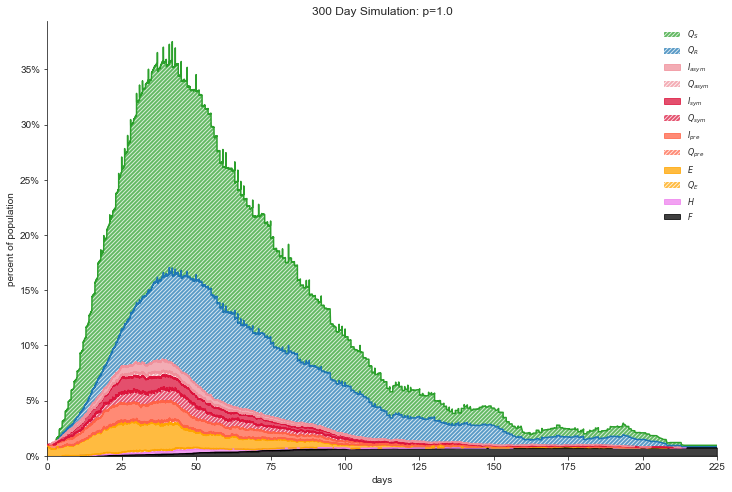

In [197]:

fig, ax = model.figure_infections(combine_Q_infected=False, plot_Q_R='stacked', plot_Q_S='stacked',title="300 Day Simulation: p=1.0")

(20930,)
[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0002 0.0002 0.0002 0.0002
 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0003 0.0003 0.0003 0.0003
 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003
 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003
 0.0003 0.0003 0.0004 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005
 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005
 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005
 0.0005 0.0005 0.0005 0.0005 0.0006 0.0007 0.0007 0.0007 0.0007 0.0007
 0.0007 0.0008 0.0008 0.0008 0.0008 0.0008 0.0008 0.0008 0.0008 0.0008
 0.0008 0.0008 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009
 0.0009 0.001  0.001  0.001  0.001  0.001  0.001  0.0011 0.0011 0.0011
 0.0011 0.0011 0.0012 0.0012 0.0012 0.0012 0.0012 0.0012 0.0013 0.0013
 

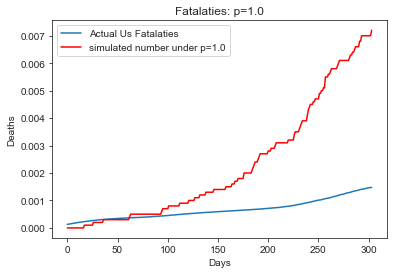

In [199]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
df = pd.read_csv(url)

F = model.numF
print(np.shape(F))
F = F[::69]/10000
print(F)
print(np.shape(F))
print(df.head(5))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
print(df.iloc[-1,11])
x = np.arange(304)
plt.plot(x,df.iloc[-1,100:404]/df.iloc[-1,11])
plt.plot(x,F,color='red')
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.title('Fatalaties: p=1.0')
plt.legend(['Actual Us Fatalaties', 'simulated number under p=1.0'])
plt.show()
